In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from collections import defaultdict

In [50]:
tables = [
        'environmental_impact',
        'additional_environmental_impact',
        'resource_use',
        'end_of_life_waste',
        'end_of_life_flow']

columns = ["A1",	"A2",	"A3",	"A1-A3", "A4",	"A5",	"B1",	"B2",	"B3",	"B4",	"B5",	"B6",	"B7",	"C1",	"C2",	"C3",	"C4",	"D"]

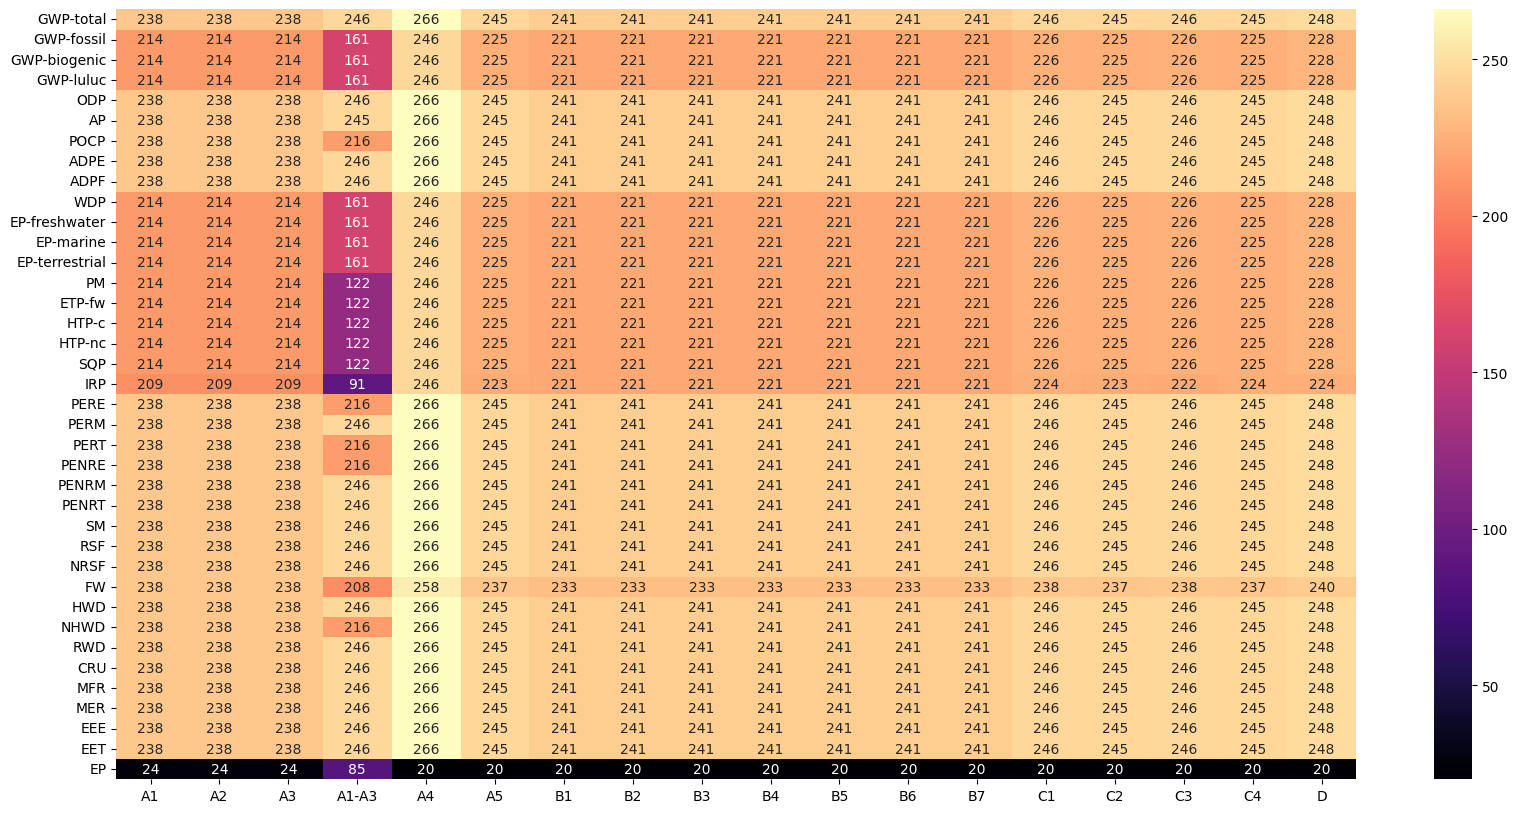

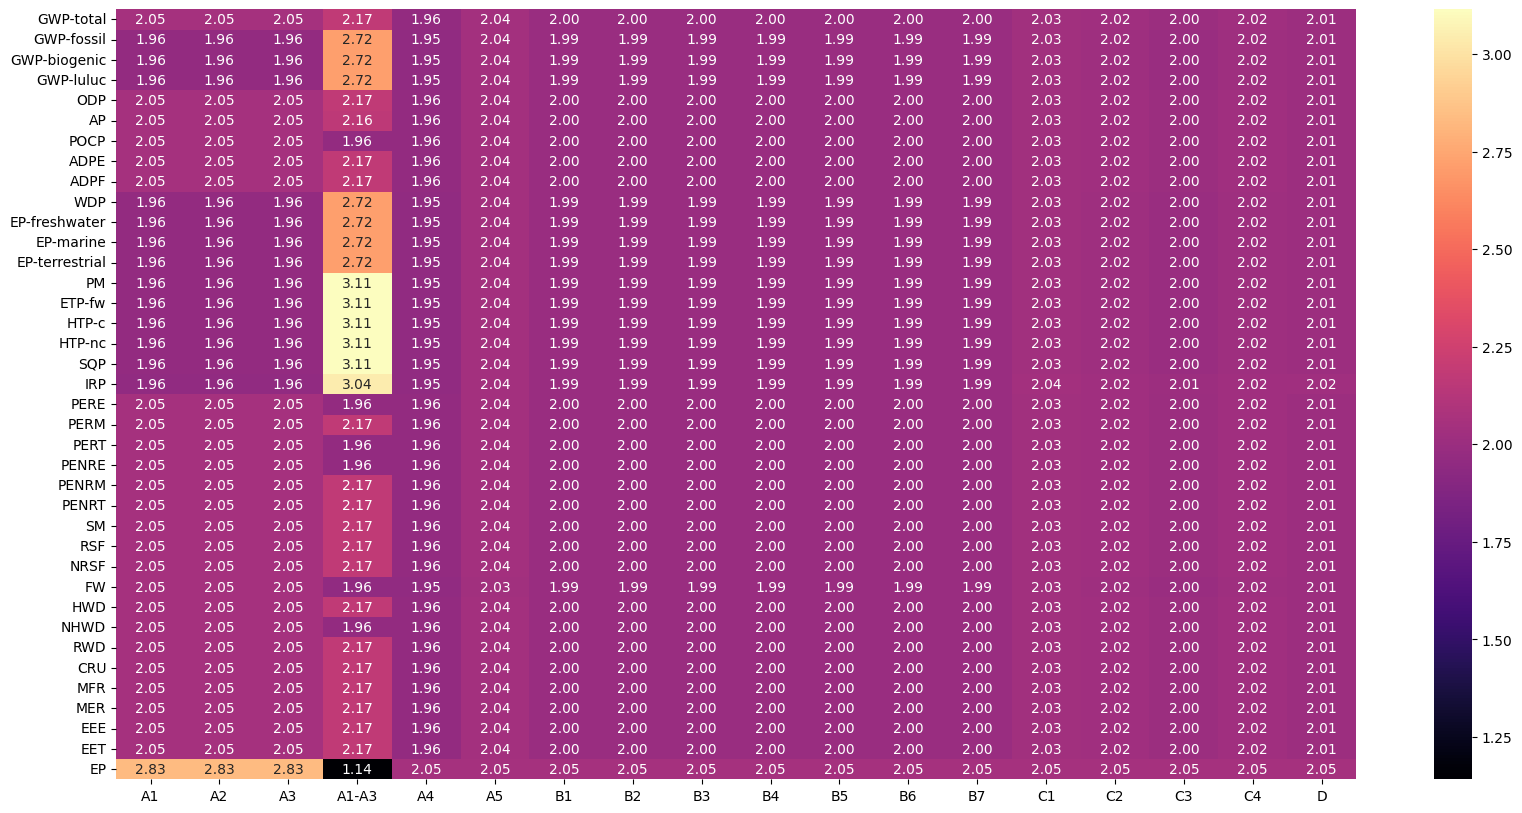

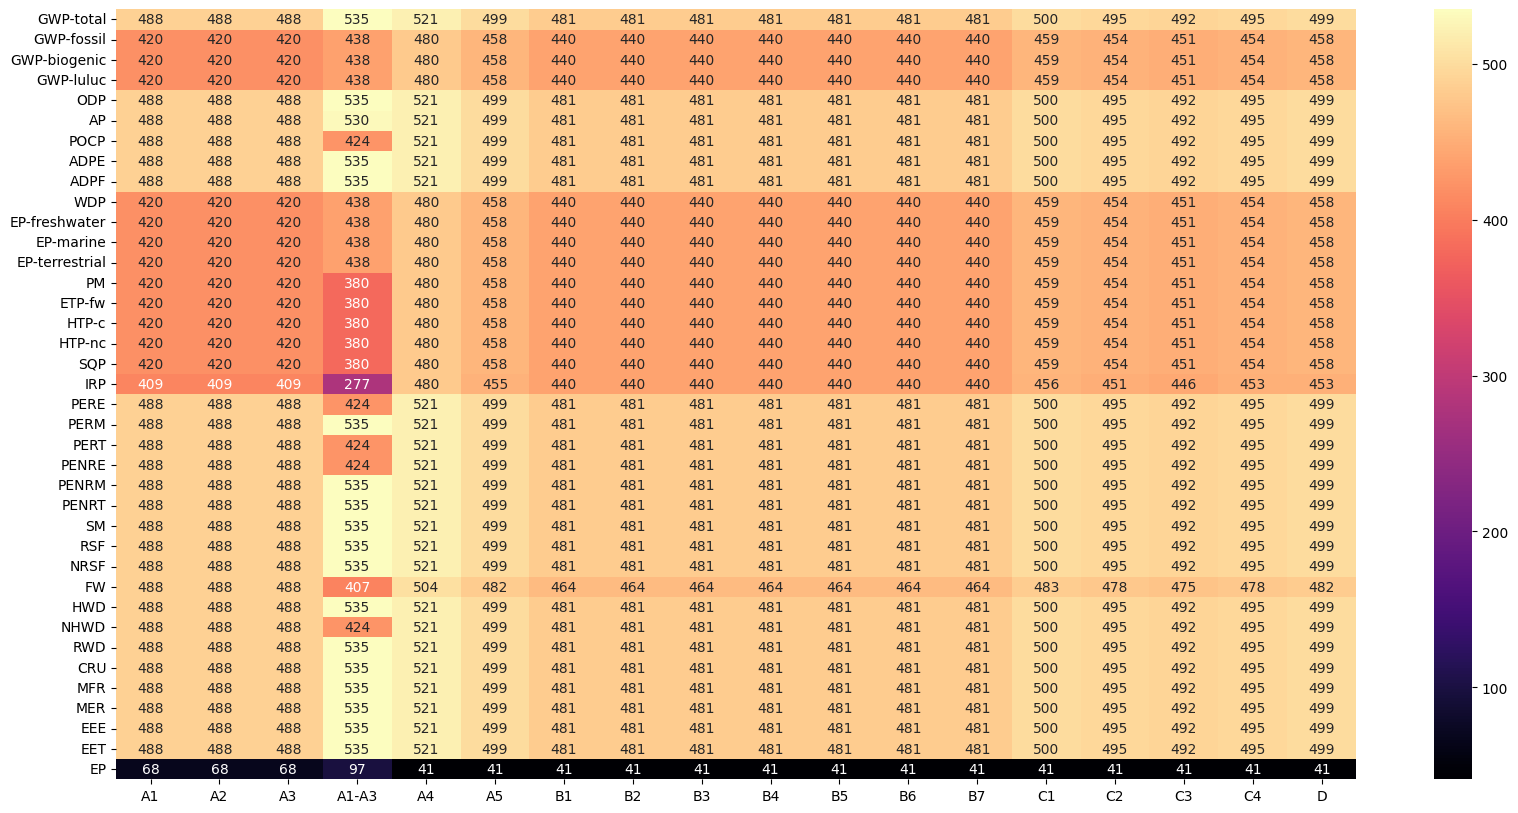

In [64]:



dataset_path = '../data/dataset/train1000_2025-04-15_sampled.jsonl'

unique = defaultdict(lambda: defaultdict(set))
sampling = defaultdict(lambda: defaultdict(dict))
total = defaultdict(lambda: defaultdict(int))

with open(dataset_path, 'r') as f:
    for line in f:
        if not line.strip():
            continue
        
        example = json.loads(line)
        target = json.loads(example['messages'][2]['content'])
        epd_id = target['epd_id']
        
        for table in tables:
            for parameter in target.get(table, []):
                parameter_name = parameter['parameter']
                for value in parameter['values']:
                    module_name = value['module']
                    unique[parameter_name][module_name].add(epd_id)
                    sampling[parameter_name][module_name][epd_id] = sampling[parameter_name][module_name].get(epd_id, 0) + 1
                    total[parameter_name][module_name] += 1
                    
unique_df = pd.DataFrame.from_dict(unique).map(lambda x: len(x) if isinstance(x, set) else x).T[columns]
avg_sampling_df = pd.DataFrame.from_dict(sampling).map(lambda x: sum(x.values()) / len(x)).T[columns]
total_df = pd.DataFrame.from_dict(total).T[columns]


plt.figure(figsize=(20, 10))

sns.heatmap(unique_df, annot=True, fmt='d', cmap='magma')


plt.figure(figsize=(20, 10))
sns.heatmap(avg_sampling_df, annot=True, fmt='0.2f', cmap='magma')

plt.figure(figsize=(20, 10))
sns.heatmap(total_df, annot=True, fmt='d', cmap='magma')

plt.show()

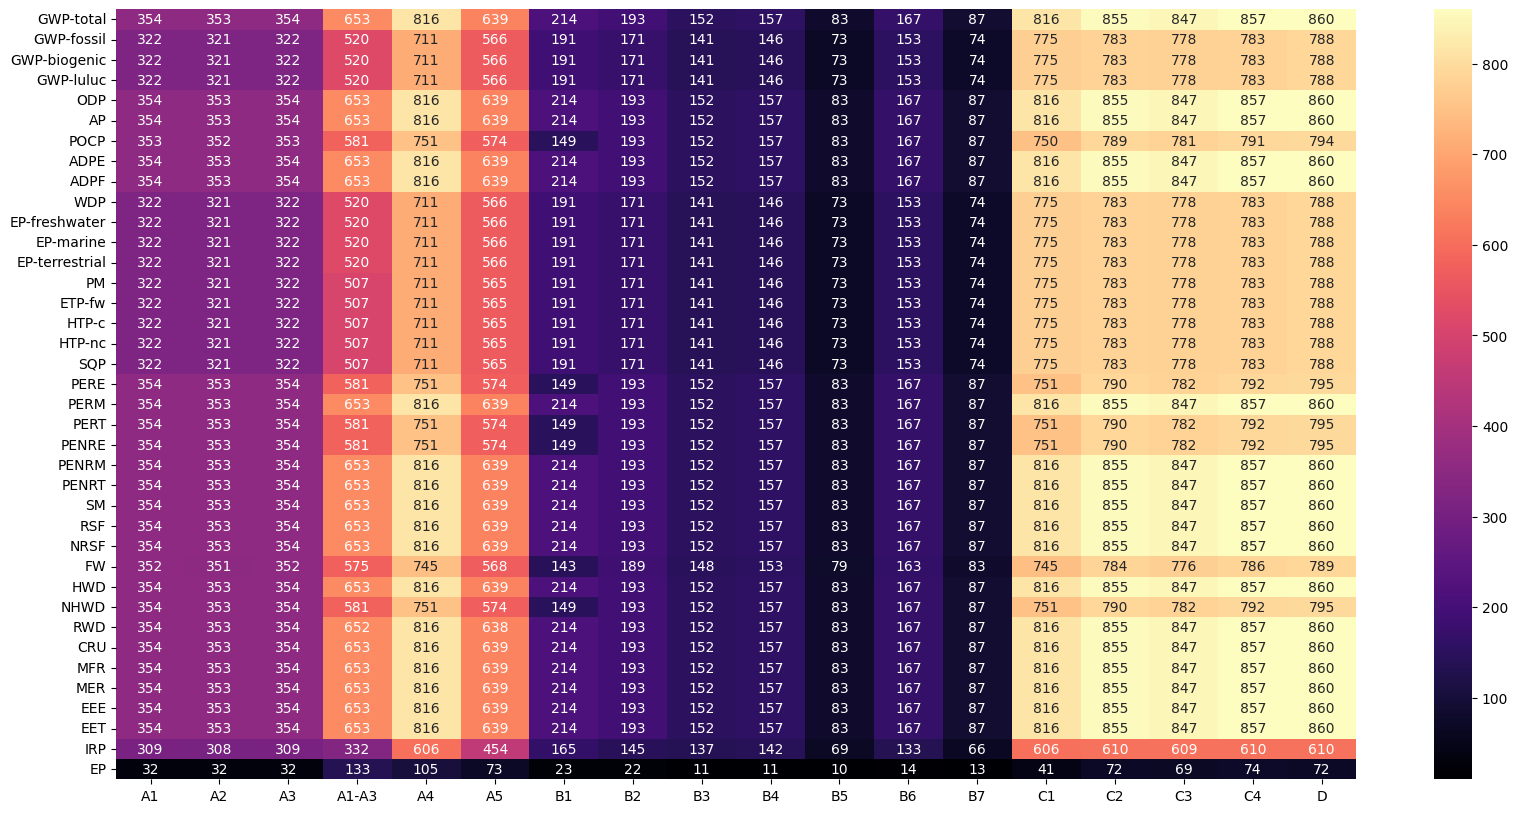

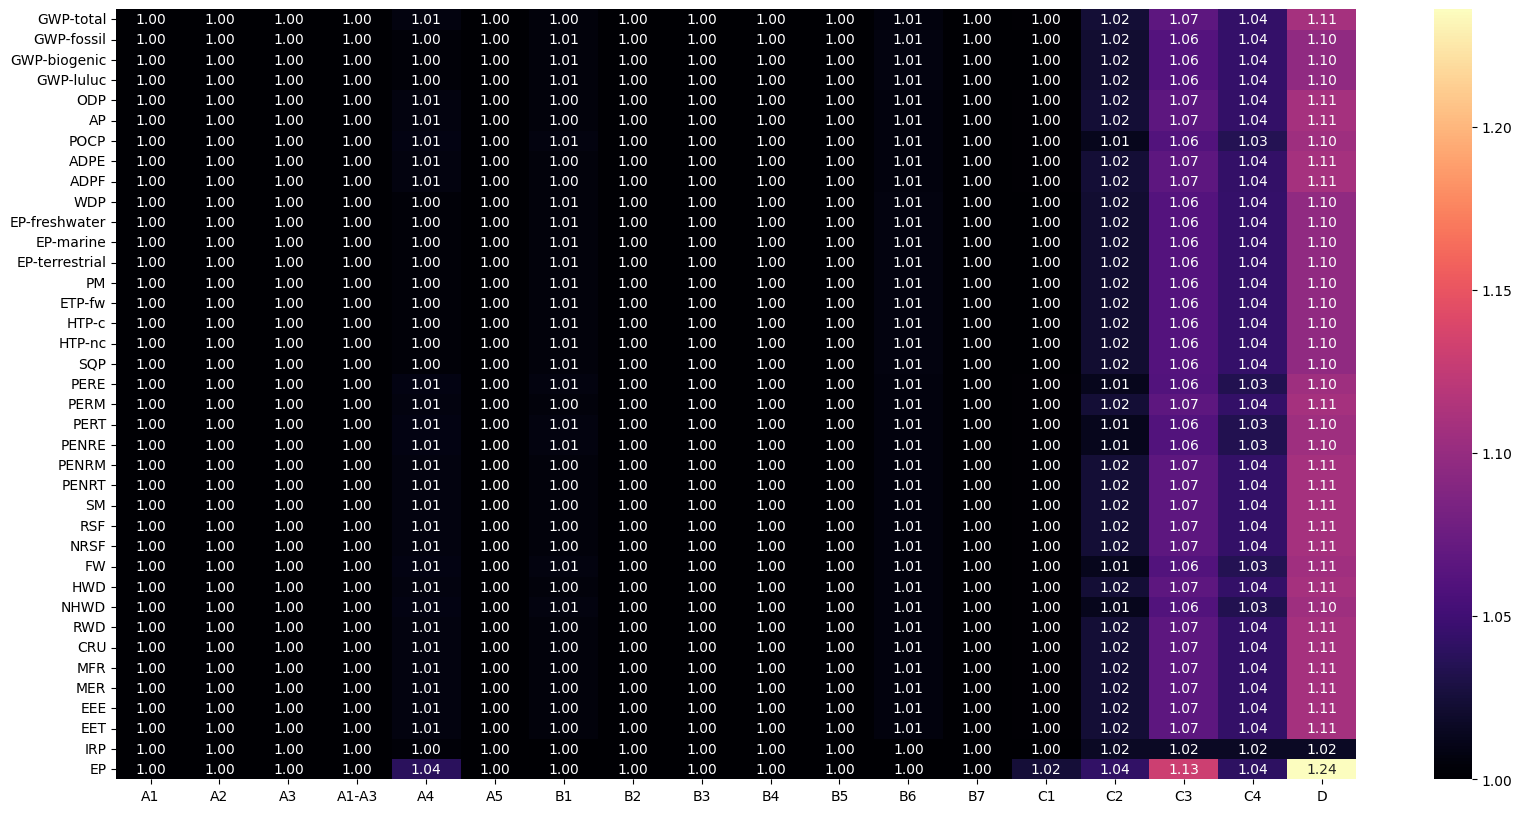

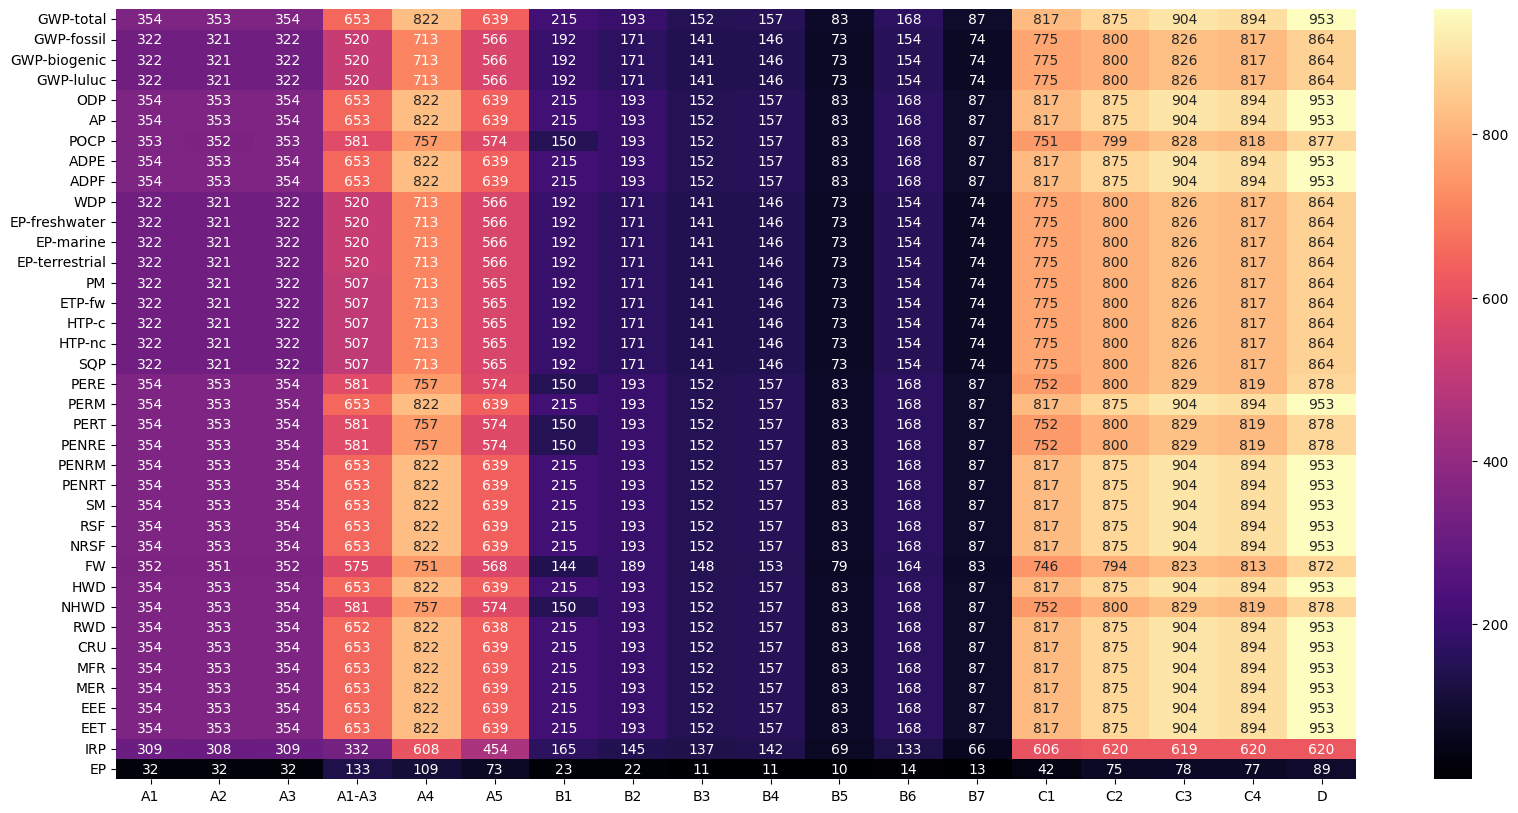

In [63]:
plt.figure(figsize=(20, 10))

sns.heatmap(unique_df, annot=True, fmt='d', cmap='magma')


plt.figure(figsize=(20, 10))
sns.heatmap(avg_sampling_df, annot=True, fmt='0.2f', cmap='magma')

plt.figure(figsize=(20, 10))
sns.heatmap(total_df, annot=True, fmt='d', cmap='magma')

plt.show()